# 과제
 - 주어진 데이터셋 ( 인구, CCTV, 범죄 )을 이용해 가설 세우기
 - 세워진 가설에 대한 데이터 전처리 수행
 - 전처리 수행 후 가설 검증 시각화
 - 결론

## 가설
* 인구대비CCTV가 많은 지역은 범죄검거율이 높을 것이다.

### 데이터 load 전 import 및 폰트 설정
데이터 프레임이 한글일 경우 Jupyter notebook에 표시가 잘 안된다. (폰트 문제 때문에)

In [161]:
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구

import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기


if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

### 범죄 데이터 Load
* 구별 범죄 수, 검거 수

In [162]:
crime_anal_gu = pd.read_csv('./data/crime_anal_gu.csv', index_col='구별', encoding='utf-8')
crime_anal_gu.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


### 각 범죄별 검거율 및 전체 범죄 검거율 구하기

In [163]:
crime_anal_gu['강간검거율'] = crime_anal_gu['강간 검거'] / crime_anal_gu['강간 발생'] * 100
crime_anal_gu['강도검거율'] = crime_anal_gu['강도 검거'] / crime_anal_gu['강도 발생'] * 100
crime_anal_gu['살인검거율'] = crime_anal_gu['살인 검거'] / crime_anal_gu['살인 발생'] * 100
crime_anal_gu['절도검거율'] = crime_anal_gu['절도 검거'] / crime_anal_gu['절도 발생'] * 100
crime_anal_gu['폭력검거율'] = crime_anal_gu['폭력 검거'] / crime_anal_gu['폭력 발생'] * 100

con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

# 전년도 범죄를 검거한 경우 100이 넘어갈 수 있다. 
# 각 검거율 컬럼에 대해 100이 넘어가는 값은 100으로 통일 
for column in con_list:
    crime_anal_gu.loc[crime_anal_gu[column] > 100, column] = 100
    
# 전체 범죄 수 및 검거율 구하기 
crime_anal_gu['전체 범죄'] = crime_anal_gu['강간 발생'] + crime_anal_gu['강도 발생'] + crime_anal_gu['살인 발생']+crime_anal_gu['절도 발생']+crime_anal_gu['폭력 발생']
crime_anal_gu['전체검거율'] =(crime_anal_gu['강간 검거'] +crime_anal_gu['강도 검거']+crime_anal_gu['살인 검거']+crime_anal_gu['절도 검거']+crime_anal_gu['폭력 검거']) / crime_anal_gu['전체 범죄'] * 100


# 검거율을 사용할 것이기 때문에 검거량에 대한 데이터는 삭제
del crime_anal_gu['강간 검거']
del crime_anal_gu['강도 검거']
del crime_anal_gu['살인 검거']
del crime_anal_gu['절도 검거']
del crime_anal_gu['폭력 검거']



crime_anal_gu.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,전체 범죄,전체검거율
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,8617,66.519670
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,5244,60.469108
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,4257,73.126615
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,5585,75.022381
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,6345,58.502758


### 보기 편하게 이름 변경 

In [164]:
crime_anal_gu.rename(columns = {
    '강간 발생' : '강간',
    '강도 발생' : '강도',
    '살인 발생' : '살인',
    '절도 발생' : '절도',
    '폭력 발생' : '폭력'}, inplace=True)

crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,전체 범죄,전체검거율
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,8617,66.519670
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,5244,60.469108
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,4257,73.126615
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,5585,75.022381
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,6345,58.502758


## CCTV, 인구수 데이터 Load 

In [165]:
pop_CCTV = pd.read_csv('./data/pop_cctv_raw.csv', encoding='utf-8', index_col = '구별')
pop_CCTV.head()

,Unnamed: 0,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,,
강남구,0,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,2,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,3,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,4,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 인구수와 CCTV 수를 범죄 데이터에 컬럼으로 추가

In [166]:
crime_anal_gu[['인구수', 'CCTV']] = pop_CCTV[['인구수', '소계']]
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,전체 범죄,전체검거율,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,8617,66.519670,570500.0,2780
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,5244,60.469108,453233.0,773
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,4257,73.126615,330192.0,748
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,5585,75.022381,603772.0,884
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,6345,58.502758,525515.0,1496


### 인구대비 CCTV 구하고 컬럼 추가 

In [167]:
crime_anal_gu['인구대비CCTV'] = crime_anal_gu['CCTV'] /crime_anal_gu['인구수'] * 100 
crime_anal_gu.head()



,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,전체 범죄,전체검거율,인구수,CCTV,인구대비CCTV
구별,,,,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,8617,66.519670,570500.0,2780,0.487292
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,5244,60.469108,453233.0,773,0.170552
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,4257,73.126615,330192.0,748,0.226535
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,5585,75.022381,603772.0,884,0.146413
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,6345,58.502758,525515.0,1496,0.284673


## 인구대비 CCTV 순으로 정렬

In [168]:
crime_anal_gu_sort = crime_anal_gu.sort_values(by='인구대비CCTV', ascending=False)
crime_anal_gu_sort

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,전체 범죄,전체검거율,인구수,CCTV,인구대비CCTV
구별,,,,,,,,,,,,,,,
용산구,194,14,5,1557,2050,89.175258,100.000000,100.000000,37.700706,83.121951,3820,65.000000,244203.0,1624,0.665020
종로구,211,11,6,2184,2293,76.303318,81.818182,83.333333,38.324176,84.212822,4705,62.550478,162820.0,1002,0.615404
중구,170,9,3,2548,2224,65.294118,66.666667,66.666667,33.712716,88.309353,4954,59.386354,133240.0,671,0.503603
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,8617,66.519670,570500.0,2780,0.487292
서초구,393,9,8,2635,2399,63.358779,66.666667,75.000000,41.404175,87.453105,5444,63.372520,450310.0,1930,0.428594
양천구,120,6,3,1890,2509,87.500000,50.000000,100.000000,35.555556,80.908729,4528,62.168728,479978.0,2034,0.423769
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433,3781,73.948691,255082.0,1015,0.397911
은평구,166,9,3,1914,2653,84.939759,66.666667,100.000000,37.147335,86.920467,4745,66.743941,494388.0,1873,0.378852
동대문구,173,13,5,1981,2548,84.393064,100.000000,100.000000,41.090358,87.401884,4720,67.902542,369496.0,1294,0.350207


## 인구대비 CCTV수에 대비한 각 범죄 검거율 그래프 그리기
* 살인검거율과 강도검거율은은 사건의 발생 횟수가 적어 신뢰도가 적어 제외하였음

/Users/son/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


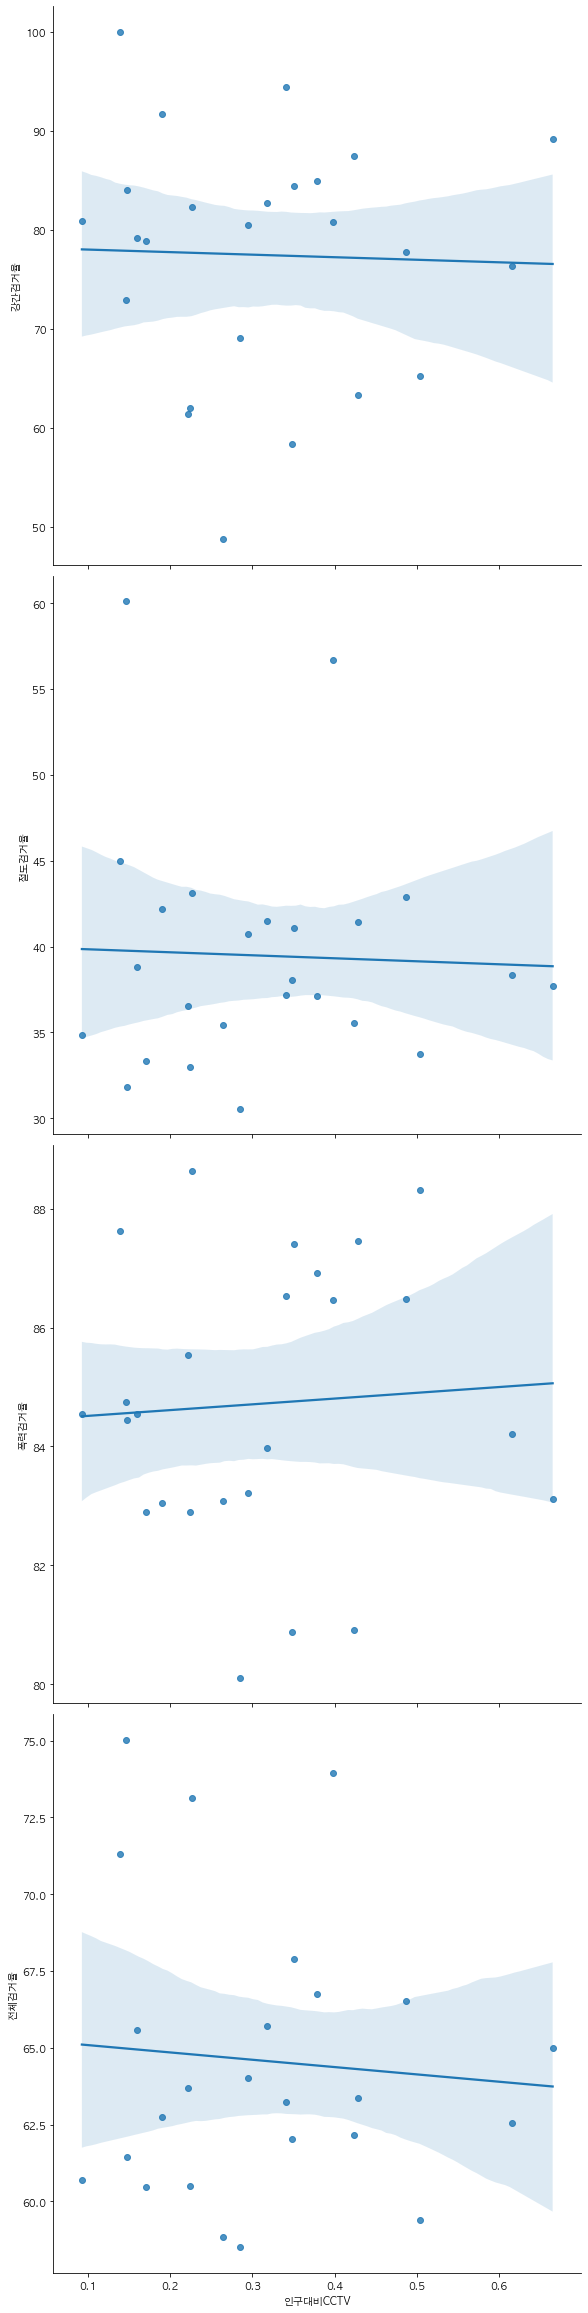

In [169]:
target_cols = ['강간검거율', '절도검거율', '폭력검거율', '전체검거율']
sns.pairplot(crime_anal_gu, x_vars=['인구대비CCTV'], y_vars=target_cols, kind='reg', size=8)
plt.show()

# 결론
* 전체검거율을 비롯하여 각 범죄 검거율이 인구대비CCTV 수에 대해서 양수 기울기의 상관관계를 보일 것이라 예상하였지만 폭력검거율을 제외하고는 모두 음수의 기울기를 보여준다. 
* 비교적 CCTV로 범죄를 쉽게 확인할 수 있는 폭력만이 CCTV 개수에 대해 영향을 받고, 강간, 절도는 CCTV로 검거하는 것이 비교적 어렵다는 것을 알 수 있다 .